## NLP Course Work 
Individual Submission 

Name - Kowshik Kesavarapu                   
    
Group - 1   

### Named Entity Recognition 

Named Entity Recognition can be done in several different ways , I mainly want to explore how a prebuilt model like Spacy or NLTK works and how they may differ from trainig our own machine learning model like Perceptron, Multi layer Perceptron , CNN and several other works. 

The main objective for me is to figure out the best approach and also find and explore different models and data sets.

Named Entity can be defined as the word which has significant value . One way describe it is it's "Noun" in a sentance . It can be name of a person , Name of a city , Date , Organization name, Amount and much more.


Some of the most common Named Entities are 


| Entity Type | Description |Example|
| --- | --- |---|
|PERSON|Name of a person (Usually recognized as first name and last name|Kowshik Kesavarapu|
|NORP|Nationalities or Religious/Political Groups|India , UK|
|FAC|Facility Name |IFH , CERN |
|ORG|Organization Name |WHO|
|GPE|Geopolitical Entity|UN|
|LOC|location|Guildford|
|PRODUCT|Product Name |Google Pixel|
|EVENT|Event Name |Google I/O|
|WORK OF ART|Work of art|Picaso|
|LAW|A law that has been published|US Act XXXX|
|LANGUAGE|Language Name |Telugu , English|
|DATE|Date , I dosen't have to be exact date terms like yesterday are also comes under this |21/04/2002 , Tuesday|
|TIME|Time , It also usually considers terms like Afternoon , Evening|2:00PM . Tonight |
|PERCENT|Percentage|100|
|MONEY|Money|$100
|QUANTITY|Measurements of weight or distance|10 Kms|
|CARDINAL|A number, similar to quantity but not a measurement|25 Books (here 25 is Cardinal) |
|ORDINAL|A number, but signifying a relative position such as “first” or “second|First prize |

## NER Using Spacy 

Considering an example to try different Methods 

This sentance has 4 Named Entities 
1) European - Country 
2) Google - Organization 
3) $5.1 billion - Money
4) Wednesday - Date 

In [1]:

ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [2]:
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [3]:
doc = nlp(ex)
 
for ent in doc.ents:
    print(ent.text, ent.label_)

European NORP
Google ORG
Wednesday DATE


This particular method is very intuitive and relatively easy to implement , We dont need to worry about Tokenization or any other pre processing , This works relatively well. But here we can see that the Spacy was not able to find money ($5.1 billion). And also one may argue that Phone is also a named entity as it was a product . Now lets see how NLTK Handels the same example 

### NER using NLTK

For NLTK we need tokenize and also tag POS using the pos_tag in nltk 

These tags are genrated using Penn Treebank Project.


The full forms of these tags are 

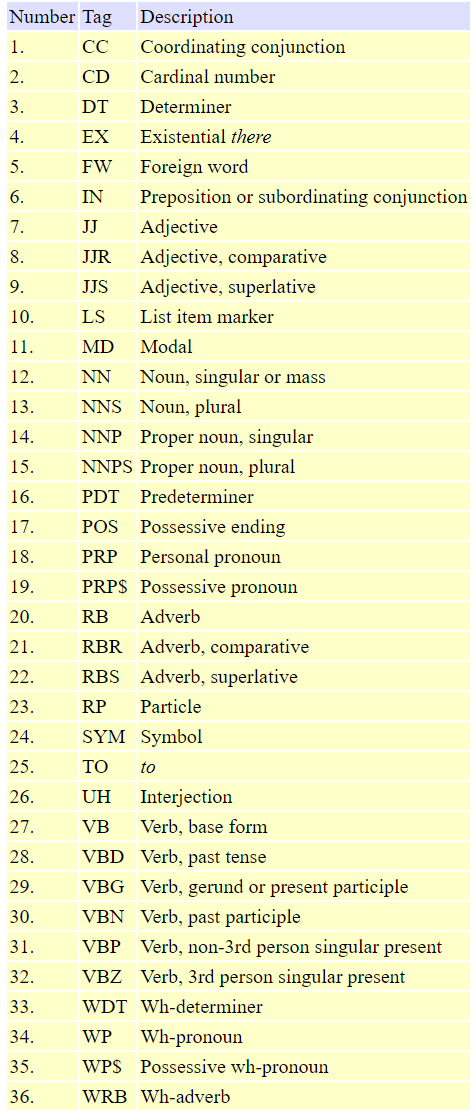


"Reference - https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html"

Once the sentance is Tokenized we can perform NER , I wrote a simple function to do all this when passed with the sentance 

We can perfoem NER and here we can see that 

Here we can see the sentance splitted and POS tagged 

In [4]:
import nltk
tokenized = nltk.word_tokenize(ex)#Tokenizing 
pos_tagged = nltk.pos_tag(tokenized)#Tagging POS 
print(pos_tagged)

[('European', 'JJ'), ('authorities', 'NNS'), ('fined', 'VBD'), ('Google', 'NNP'), ('a', 'DT'), ('record', 'NN'), ('$', '$'), ('5.1', 'CD'), ('billion', 'CD'), ('on', 'IN'), ('Wednesday', 'NNP'), ('for', 'IN'), ('abusing', 'VBG'), ('its', 'PRP$'), ('power', 'NN'), ('in', 'IN'), ('the', 'DT'), ('mobile', 'JJ'), ('phone', 'NN'), ('market', 'NN'), ('and', 'CC'), ('ordered', 'VBD'), ('the', 'DT'), ('company', 'NN'), ('to', 'TO'), ('alter', 'VB'), ('its', 'PRP$'), ('practices', 'NNS')]


In [5]:
def ner_nltk(sent):
    tokenized = nltk.word_tokenize(ex)#Tokenizing 
    pos_tagged = nltk.pos_tag(tokenized)#Tagging POS 
    chunks = nltk.ne_chunk(pos_tagged)#Performing NER
    for chunk in chunks:
        if hasattr(chunk, 'label'):
            print(chunk)

In [6]:
ner_nltk(ex)

(GPE European/JJ)
(PERSON Google/NNP)


Here we can see that the NLTK havent performed well and was only able to find two entities. Although this seems to be not at all scientific way to compare from my research i found that Spacy often performs well than NLTK as it was trained on much larger data set.

Now there is also a another way of getting the NER this is by using The Text API which is a Text analysis model. 

In [7]:
import requests
import json
text= "Molly Moon is a cow. She is part of the United Nations' Climate Action Committee."
headers = {
    "Content-Type": "application/json",
    "apikey": '6d8398eb-dd38-4e39-b28f-8ce00ff9c4d3'
}
body = {
    "text": ex
}
url = "https://app.thetextapi.com/text/ner"
 
response = requests.post(url, headers=headers, json=body)
ner = json.loads(response.text)["ner"]
print(ner)

[['ORG', 'Google'], ['MONEY', 'a record $5.1 billion'], ['DATE', 'Wednesday']]


This is another way but this model was sucessfull in finding the Money but missed the European Union 

Now that we covered three different relatively straight forward ways to do NER , Now i am going to experiment with building my own model by training using the ner_dataset , Which contains the data of several thousand sentances along with their POS and NER tags.

### Building the model using SKlearn 

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [9]:
df = pd.read_csv('ner_dataset.csv', encoding = "ISO-8859-1")
df = df[:100000]
df.head()

Sentence #           Word  POS Tag
0  Sentence: 1      Thousands  NNS   O
1          NaN             of   IN   O
2          NaN  demonstrators  NNS   O
3          NaN           have  VBP   O
4          NaN        marched  VBN   O

In [10]:
#Doing some data cleaning 
df = df.fillna(method='ffill')

In [11]:
df['Sentence #'].nunique(), df.Word.nunique(), df.Tag.nunique()

(4544, 10922, 17)

So we have 4544 sentances. with 10922 words and 17 Tags 

Lets see what the tags are 

In [12]:
df.groupby('Tag').size().reset_index(name='counts')

Tag  counts
0   B-art      75
1   B-eve      53
2   B-geo    3303
3   B-gpe    1740
4   B-nat      30
5   B-org    1876
6   B-per    1668
7   B-tim    1823
8   I-art      43
9   I-eve      47
10  I-geo     690
11  I-gpe      51
12  I-nat      11
13  I-org    1470
14  I-per    1846
15  I-tim     549
16      O   84725

In [14]:
v = DictVectorizer(sparse=False)
X = df.drop('Tag', axis=1)
X = v.fit_transform(X.to_dict('records'))
y = df.Tag.values


In [16]:
classes = np.unique(y)
classes = classes.tolist()
classes

['B-art',
 'B-eve',
 'B-geo',
 'B-gpe',
 'B-nat',
 'B-org',
 'B-per',
 'B-tim',
 'I-art',
 'I-eve',
 'I-geo',
 'I-gpe',
 'I-nat',
 'I-org',
 'I-per',
 'I-tim',
 'O']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

In [20]:
per = Perceptron(verbose=10, n_jobs=-1, max_iter=5)
per.partial_fit(X_train, y_train, classes)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 56.87, NNZs: 2044, Bias: -4.000000, T: 67000, Avg. loss: 0.034970
Total training time: 2.40 seconds.
-- Epoch 1
Norm: 48.83, NNZs: 1578, Bias: -4.000000, T: 67000, Avg. loss: 0.022328
Total training time: 2.33 seconds.
-- Epoch 1
Norm: 44.41, NNZs: 1127, Bias: -4.000000, T: 67000, Avg. loss: 0.017164
Total training time: 2.34 seconds.
-- Epoch 1
Norm: 11.53, NNZs: 113, Bias: -3.000000, T: 67000, Avg. loss: 0.001060
Total training time: 2.48 seconds.
-- Epoch 1
Norm: 68.07, NNZs: 2642, Bias: -4.000000, T: 67000, Avg. loss: 0.041776
Total training time: 2.43 seconds.
-- Epoch 1
Norm: 13.42, NNZs: 162, Bias: -4.000000, T: 67000, Avg. loss: 0.001642
Total training time: 2.53 seconds.
-- Epoch 1
Norm: 8.43, NNZs: 57, Bias: -3.000000, T: 67000, Avg. loss: 0.000567
Total training time: 2.49 seconds.
-- Epoch 1
Norm: 49.90, NNZs: 1337, Bias: -4.000000, T: 67000, Avg. loss: 0.015328
Total training time

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   4 out of  17 | elapsed:    2.4s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   6 out of  17 | elapsed:    2.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done   8 out of  17 | elapsed:    2.5s remaining:    2.8s


Norm: 35.13, NNZs: 803, Bias: -4.000000, T: 67000, Avg. loss: 0.011149
Total training time: 2.06 seconds.
-- Epoch 1
Norm: 6.24, NNZs: 31, Bias: -3.000000, T: 67000, Avg. loss: 0.000209
Total training time: 2.05 seconds.
Norm: 53.57, NNZs: 1703, Bias: -4.000000, T: 67000, Avg. loss: 0.026224Norm: 30.53, NNZs: 672, Bias: -4.000000, T: 67000, Avg. loss: 0.012030
Total training time: 2.12 seconds.

Total training time: 2.05 seconds.
Norm: 10.44, NNZs: 106, Bias: -3.000000, T: 67000, Avg. loss: 0.001060
Total training time: 2.22 seconds.
Norm: 11.45, NNZs: 96, Bias: -3.000000, T: 67000, Avg. loss: 0.000776
Total training time: 2.24 seconds.
Norm: 11.00, NNZs: 102, Bias: -3.000000, T: 67000, Avg. loss: 0.001209
Total training time: 2.20 seconds.


[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    4.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    4.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    4.6s remaining:    0.9s


Norm: 60.35, NNZs: 2091, Bias: -6.000000, T: 67000, Avg. loss: 0.026940
Total training time: 2.23 seconds.
Norm: 73.89, NNZs: 2851, Bias: 4.000000, T: 67000, Avg. loss: 0.048866
Total training time: 1.19 seconds.


[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    5.6s finished


Perceptron(max_iter=5, n_jobs=-1, verbose=10)